In [1]:
import matplotlib.pyplot as plt
import scipy as sp
import scipy.special
import pandas as pd
import scipy.stats
import numpy as np

# <font face="gotham" color="purple"> Point Estimator

To estimate the population parameters (e.g. average income of man with a master degree), we compute corresponding characteristics of the sample, referred to as **sample statistic**. 

Any types of single value sample statistic is called **point estimator**, previously we have seen  **Sample mean, standard deviation, variance**, which all are point estimators of populations. For instance, $\bar{x}$ is the point estimator of $\mu$ and $s^2$ the point estimator of $\sigma^2$.

# <font face="gotham" color="purple"> Sampling Distribution

The pointer estimators themselves are random variables. For instance we have 10 samples of household income, so each sample has a mean value, which are most probably different than each other, therefore the sample mean is essentially a random variable.|

The distribution of point estimator is called the  **sampling distribution**, i.e. the distribution of sample statistics. The knowledge of its properties will enable us to make statements about how close the point estimates (e.g. sample mean) to the population parameters.

## <font face="gotham" color="purple"> Sampling Distribution of $\bar{X}$

If point estimators are unbiased, then  **mean of sampling distribution** and  **standard error of the mean** are:
$$
E(\bar{X})=\mu\\
\sigma_{\bar{X}}=\frac{\sigma}{\sqrt{n}}\sqrt{\frac{N-n}{N-1}}
$$

The name of _standard error_ generally is used when referring to the standard deviation of a sampling distribution.

To illustrate the sampling distribution of $\bar{X}$, we will generate a population of $100000$ people's height with standard deviation of $3$, mean of $170$cm.

In [2]:
mu = 170
sigma = 3
pop_size = 100000
pop_height = sp.stats.norm.rvs(mu, sigma, size = pop_size) 

Now pretend that we know nothing of the population, but we are able to draw as many samples as possible with zero cost (this will never be possible in real world, but perfect illustration to sampling distribution). After drawing each sample we calculate the sample mean then append onto the list ```sample_mean```, finally we plot the histogram.

Here we plot six sampling distributions with increasing sample sizes, the larger the sample size $n$, the smaller the standard errors are. The red dashed line is a normal distribution $z\sim N(170, 3)$, in contrast, the histogram of sample mean is much concentrated.

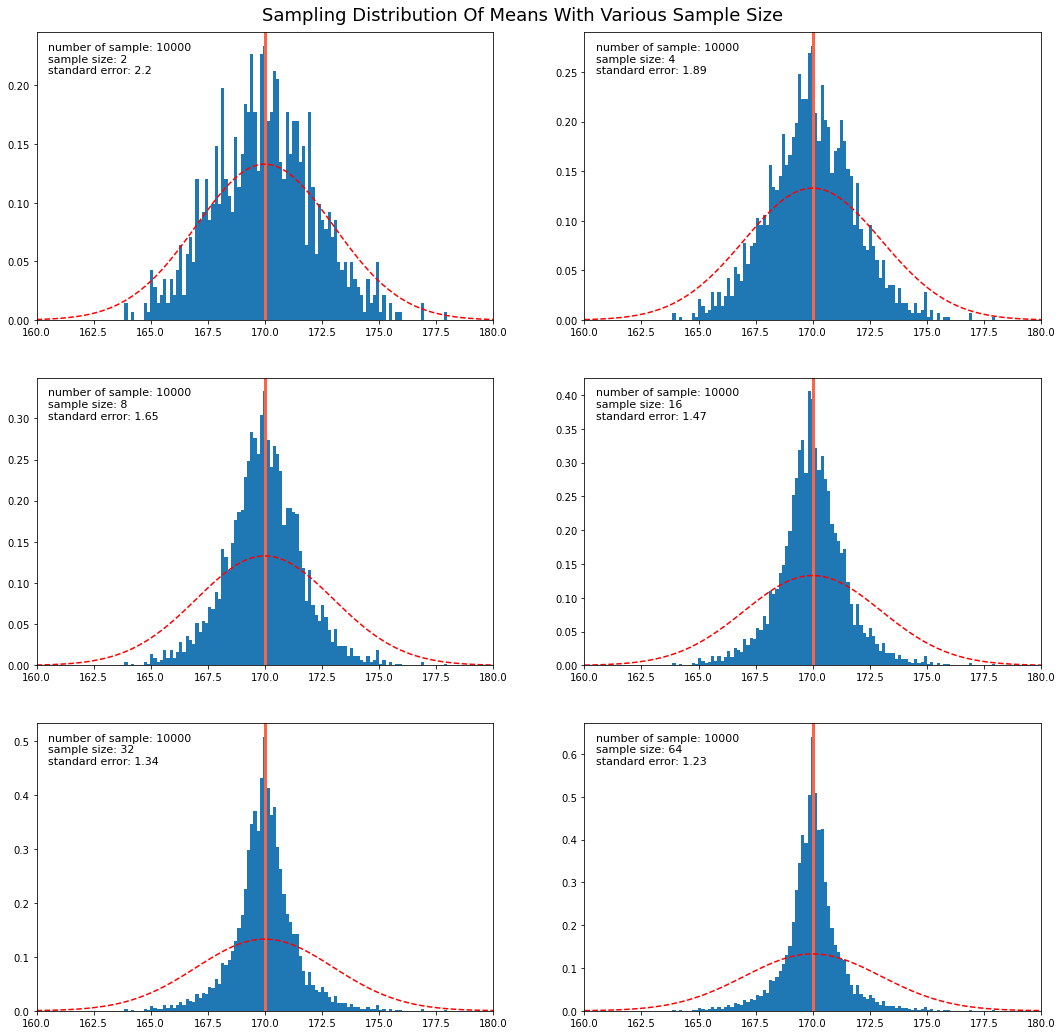

In [3]:
sample_sizes = [2**i for i in range(1, 7)]
number_of_sample = 1000
sample_means = []

norm_pdf_x = np.linspace(160, 180, 100)
norm_pdf_y = sp.stats.norm.pdf(norm_pdf_x, mu, sigma)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))
for indx, ax in enumerate(axs.flatten()):
    for i in range(number_of_sample):
        sample_means.append(np.mean(np.random.choice(pop_height, size = sample_sizes[indx])))
    n, bins, patches = ax.hist(sample_means, bins = 100, label = 'Sampling Distribution of Mean of Height', density= True)
    ax.axvline(x = mu, color = 'tomato', lw = 3)
    ax.plot(norm_pdf_x, norm_pdf_y, 'r--', label="$z\sim N(170, 3)$")    
    ax.set_xlim(160, 180)
    ax.annotate('number of sample: {}\nsample size: {}\nstandard error: {}'
                .format(10000, sample_sizes[indx], round(np.std(sample_means, ddof=1), 2)), (160.5, np.max(n)*.90), size = 11)
fig.suptitle('Sampling Distribution Of Means With Various Sample Size', y = 0.9, size = 18)
plt.show()

From $\sigma_{\bar{x}}=\frac{\sigma}{\sqrt{n}}\sqrt{\frac{N-n}{N-1}}$, we can see as $n\rightarrow N$, then $\sigma_{\bar{x}}\rightarrow 0$.

Though raising sample size can contract the variation of sampling distribution,  but efficiency drops relatively fast. Take a look at graph of $\sqrt{n}$, the slope is steep in the beginning, then flattens as the sample size increases.

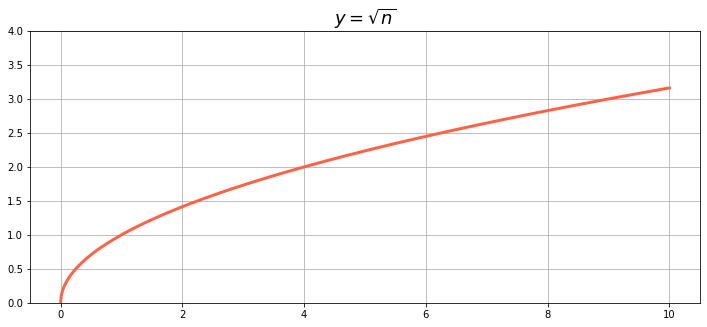

In [4]:
x = np.linspace(0, 10, 1000)
y = np.sqrt(x)
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(x, y, color = 'tomato', lw = 3)
ax.set_ylim(0, 4)
ax.grid()
ax.set_title('$y=\sqrt{n}$', size = 18)
plt.show()

There are also sampling distribution of sample variances.

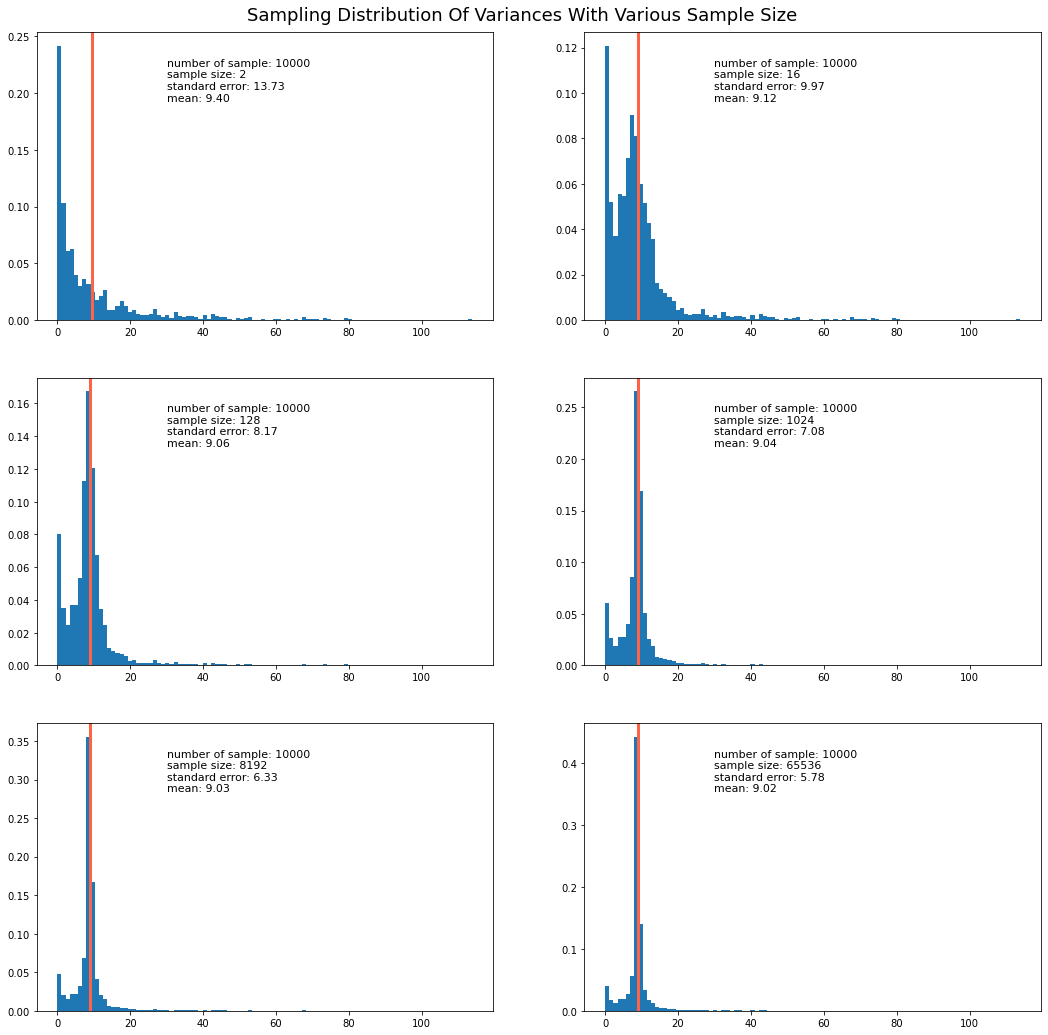

In [5]:
sample_sizes = [2**i for i in range(1, 18,3)]
number_of_sample = 1000
sample_vars = []

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))
for indx, ax in enumerate(axs.flatten()):
    for i in range(number_of_sample):
        sample_vars.append(np.var(np.random.choice(pop_height, size = sample_sizes[indx]), ddof = 1))
    n, bins, patches = ax.hist(sample_vars, bins = 100, label = 'Sampling Distribution of Variance of Height', density= True)
    ax.axvline(x = np.mean(sample_vars), color = 'tomato', lw = 3)
    ax.annotate('number of sample: {}\nsample size: {}\nstandard error: {:.2f}\nmean: {:.2f}'
                .format(10000, sample_sizes[indx], np.std(sample_vars, ddof=1), np.mean(sample_vars)), (30, np.max(n)*.80), size = 11)
fig.suptitle('Sampling Distribution Of Variances With Various Sample Size', y = 0.9, size = 18)
plt.show()

# <font face="gotham" color="purple"> Central Limit Theorem

We mentioned above that properties of sampling distribution can help us making meaningful inferences about population. The most important property is **Central Limit Theorem** which guarantees that with large sample size, we can safely assume the sample mean follows a normal distribution. With this information, we can make statistical inferences such as how far away the sample mean is from the population mean?

Here is the classical definition:

$\{\bar{X}_1,...\bar{X}_2\}$ is a random i.i.d. sequence drawn from an unknown distribution whose $E(X_i)=\mu$ and $\text{Var}(X_i)=\sigma^2$, as $n\rightarrow \infty$, we have 
$$
\sqrt{n}(\bar{X}_n-\mu)\xrightarrow[]{d} N(0, \sigma^2)
$$

Simply speaking, sampling distribution of sample mean will converge to a normal distribution when sample size is large enough. The figure below shows three different distributions other than normal distribution, as the sample size increases their sampling distributions converge to normal distribution.

The code is in module ```plot_material```.

In [ ]:
from plot_material import central_limit_theorem_plot
central_limit_theorem_plot()

Font 'default' does not have a glyph for '\uff0c' [U+ff0c], substituting with a dummy symbol.


# <font face="gotham" color="purple"> Sample Size and Estimation Accuracy

Here is a concrete example that demonstrates how sample sizes influence the estimation accuracy.

To estimate the average height of female in the city of Helsinki, we measure the height of $n = 30$ female adults, we have the sample mean but we also would like to know if the sample mean is within $\pm 1.5cm$ of population mean. And we need to have a key but unrealistic assumption: we know the population standard deviation of the height: $\sigma = 6 cm$.

Step 1: Because we know the $\sigma$, we can calculate the standard error of the mean by using 

\begin{equation}
\sigma_{\bar{x}}=\frac{\sigma}{\sqrt{n}}= \frac{6}{\sqrt{30}}
\end{equation}



In [ ]:
sigma = 6
std_err = sigma/np.sqrt(30)
std_err

Step 2: Calculate of range in terms of standard errors.

In [ ]:
z_right = 1.5/std_err # plus or minus zr/zl units of std errors
z_left = -1.5/std_err

In [ ]:
p = sp.stats.norm.cdf(z_right)-sp.stats.norm.cdf(z_left)
print('The probability of sample mean (sample size = 30) being within 1.5cm of pop mean is {0:.2f}%.'.format(p*100))

Now let's increase the sample size to 60 persons. 

In [ ]:
sigma = 6
ss = 60

std_err = sigma/np.sqrt(ss)
zr = 1.5/std_err # plus or minus zr/zl units of std errors
zl = -1.5/std_err
p = sp.stats.norm.cdf(zr)-sp.stats.norm.cdf(zl)
print('The probability of sample mean (sample size = {0}) being within 1.5cm of pop mean is {1:.2f}%.'.format(ss, p*100))

And this figure can show how the sample size can influence the estimation accuracy. We will come back to similar topics in interval estimations.

In [ ]:
sigma = 6
p = np.zeros(100)
for i in range(2, 100):
    std_err = sigma/np.sqrt(i)
    zr = 1.5/std_err # plus or minus zr/zl units of std errors
    zl = -1.5/std_err
    p[i] = sp.stats.norm.cdf(zr)-sp.stats.norm.cdf(zl)
fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(np.arange(100), p, lw = 3, color = 'r')
ax.set_xlabel('Sample Size', size = 16)
ax.set_ylabel('Probability', size = 16)
ax.set_title('The probability of sample mean being within 1.5cm of pop mean',size = 18)
plt.show()

# <font face="gotham" color="purple"> Interval Estimation With Known $\sigma$

The example above is exactly an **interval estimation** of population mean with known $\sigma$. We will dive deeper here, once you understand the logic of interval estimation, you will have much easier time in later chapters.

We have talked about _Central Limit Theorem_ which guarantees that $\bar{X}$ is normally distributed with sufficiently large samples. But we almost always convert $\bar{X}$ into a standard normal distribution before making any inferences.
$$
Z=\frac{\bar{x}-\mu}{\sigma/\sqrt{n}}
$$

Essentially, it is a $z$-score of $\bar{X}$ as we mentioned in chapter 1. To make any meaningful interval estimation, we need a notation $z_{\alpha/2}$, such as $z_{0.025}=1.96$. It means the area to the right of $1.96$ is $0.025$.

To establish an interval
$$
P\bigg(-z_{\alpha/2} < \frac{\bar{x}-\mu}{\sigma/\sqrt{n}} < z_{\alpha/2}\bigg)=.95
$$
With a bit rearrangement, which means that with $1-\alpha$ probability the $X$ will fall in this range.
$$
P\bigg(\mu-z_{\alpha/2}\frac{\sigma}{\sqrt{n}} < \bar{x}< \mu+z_{\alpha/2}\frac{\sigma}{\sqrt{n}}\bigg)=1-\alpha
$$

The sample mean of women's height in Helsinki will fall in 
$$
P\bigg(170-1.96\frac{6}{\sqrt{30}} < \bar{x}< 170+1.96\frac{6}{\sqrt{30}}\bigg)=.95
$$

In [ ]:
print(170-1.96*6/np.sqrt(30))
print(170+1.96*6/np.sqrt(30))

However expression above is less common in practice, more commonly $\mu$ is set as the centre of the interval, a slight rearrangement gives us
$$
P\bigg(\bar{x}-Z_{\alpha/2}\frac{\sigma}{\sqrt{n}}<\mu<\bar{x}+Z_{\alpha/2}\frac{\sigma}{\sqrt{n}}\bigg)
$$

this is officially called **confidence interval estimator of population mean**. It states that there is $1-\alpha$ probability that $\bar{X}$ will equal to a value such that the interval will include the population mean.

## <font face="gotham" color="purple"> Example of Sleeping Hours

Suppose we have a sample of ten old person (>70 years old) whose average sleeping time recorded as below

In [ ]:
sleep_time = [8.3, 6.9, 4.3, 10.8, 7.9, 9.6, 6.8, 5.6, 7.7]

The standard deviation of the population sleeping time is $2$, enough information to calculate the confidence interval of $95\%$.

In [ ]:
LCL = np.mean(sleep_time)-1.96*2/np.sqrt(len(sleep_time))
UCL = np.mean(sleep_time)+1.96*2/np.sqrt(len(sleep_time))
print('Confidence interval of 95% is ({:.2f}, {:.2f}).'.format(LCL, UCL))

Because the sample size is considerably small, the confidence interval doesn't provide much info either. 

Here we've created a class for population of old people's sleeping time with some methods for easy computation of interval estimators, i.e. ```conf_interval``` for _known $\sigma$_ and ```conf_interval_t``` for _unknown $\sigma$_.

In [ ]:
class OldPeopleSleep:
    def __init__(self, mean, std, pop_size):
        self.std = std
        self.population = sp.stats.norm.rvs(loc=mean, scale=std, size=pop_size)
    
    def sampling(self, size):
        self.sample = np.random.choice(self.population, size)
    
    def conf_interval(self, confidence_level, two_tail = True):
        '''For simplicity, we only show a two tail confidence interval.'''
        if two_tail == True:
            ppf = 1 - (1 - confidence_level)/2
            z = round(sp.stats.norm.ppf(ppf), 2)
            LCL = np.mean(self.sample)-z*self.std/np.sqrt(len(self.sample))
            UCL = np.mean(self.sample)+z*self.std/np.sqrt(len(self.sample))
            return LCL, UCL
    def conf_interval_t(self, confidence_level, two_tail = True):
        '''For simplicity, we only show a two tail confidence interval.'''
        if two_tail == True:
            ppf = 1 - (1 - confidence_level)/2
            t = round(sp.stats.t.ppf(ppf, df = len(self.sample)-1), 2)
            LCL_t = np.mean(self.sample)-t*np.std(self.sample, ddof = 1)/np.sqrt(len(self.sample))
            UCL_t = np.mean(self.sample)+t*np.std(self.sample, ddof = 1)/np.sqrt(len(self.sample))
            return LCL_t, UCL_t

Generate a population and take a sample of 100 persons, calculate the confidence interval

In [ ]:
population_mean = 7.5
old_ppl = OldPeopleSleep(population_mean, std=2, pop_size=100000)
old_ppl.sampling(100)
old_ppl.conf_interval(.95, two_tail=True)

We will simulate repetitive sampling and show that $95\%$ of time the confidence interval can include the population mean. We draw sample ```simu_time``` times, each time calculate its confidence interval based on sampling distribution, if the population mean is included in confidence interval, we append a $1$ onto a list named ```conf_inclusion```, otherwise append a $0$. 

It shows that round $95\%$ of times the confidence interval will indeed include population mean.

In [ ]:
conf_inclusion =[]
simu_time = 10000
for i in range(simu_time):
    old_ppl.sampling(100)
    conf_interval = old_ppl.conf_interval(.95, two_tail=True)
    if conf_interval[0] <= population_mean and population_mean <= conf_interval[1]:
        conf_inclusion.append(1)
    else:
        conf_inclusion.append(0)
print('Total number of simulation: {}'.format(simu_time))
print('Number of inclusion: {}'.format(np.sum(conf_inclusion)))
print('Inclusion rate: {}'.format(np.sum(conf_inclusion)/len(conf_inclusion)))

# <font face="gotham" color="purple"> Interval Estimation With Unknown $\sigma$

In practice, we barely have the knowledge of the $\sigma$, then $s$ is used instead. Because of unknown $\sigma$, the sampling distribution of mean will be based on $t$-distribution. A $t$-distribution with large degree of freedom is very close to a normal distribution, while smaller degree of freedom will cause fatter tails in $t$-distribution than normal distribution.

The notation of interval estimator based on $t$-distribution is similar to the one based on the normal distribution
$$
P\bigg(\bar{x}-t_{\alpha/2}\frac{s}{\sqrt{n}}<\mu<\bar{x}+t_{\alpha/2}\frac{s}{\sqrt{n}}\bigg)
$$
where $s$ is the sample standard deviation
$$ 
s = \sqrt{\frac{\sum(x_i - \bar{x})^2}{n-1}}
$$

We can compare the confidence based on normal and $t$-distribution, very similar.

In [ ]:
population_mean = 7.5
old_ppl = OldPeopleSleep(population_mean, std=2, pop_size=100000)
old_ppl.sampling(10)
print(old_ppl.conf_interval(.95, two_tail=True))
print(old_ppl.conf_interval_t(.95, two_tail=True))

In [ ]:
conf_inclusion_t =[]
simu_time = 10000
for i in range(simu_time):
    old_ppl.sampling(100)
    conf_interval_t = old_ppl.conf_interval_t(.95, two_tail=True)
    if conf_interval_t[0] <= population_mean and population_mean <= conf_interval_t[1]:
        conf_inclusion_t.append(1)
    else:
        conf_inclusion_t.append(0)
print('Total number of simulation: {}'.format(simu_time))
print('Number of inclusion: {}'.format(np.sum(conf_inclusion)))
print('Inclusion rate: {}'.format(np.sum(conf_inclusion)/len(conf_inclusion)))